Original DataFrame:
         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  2

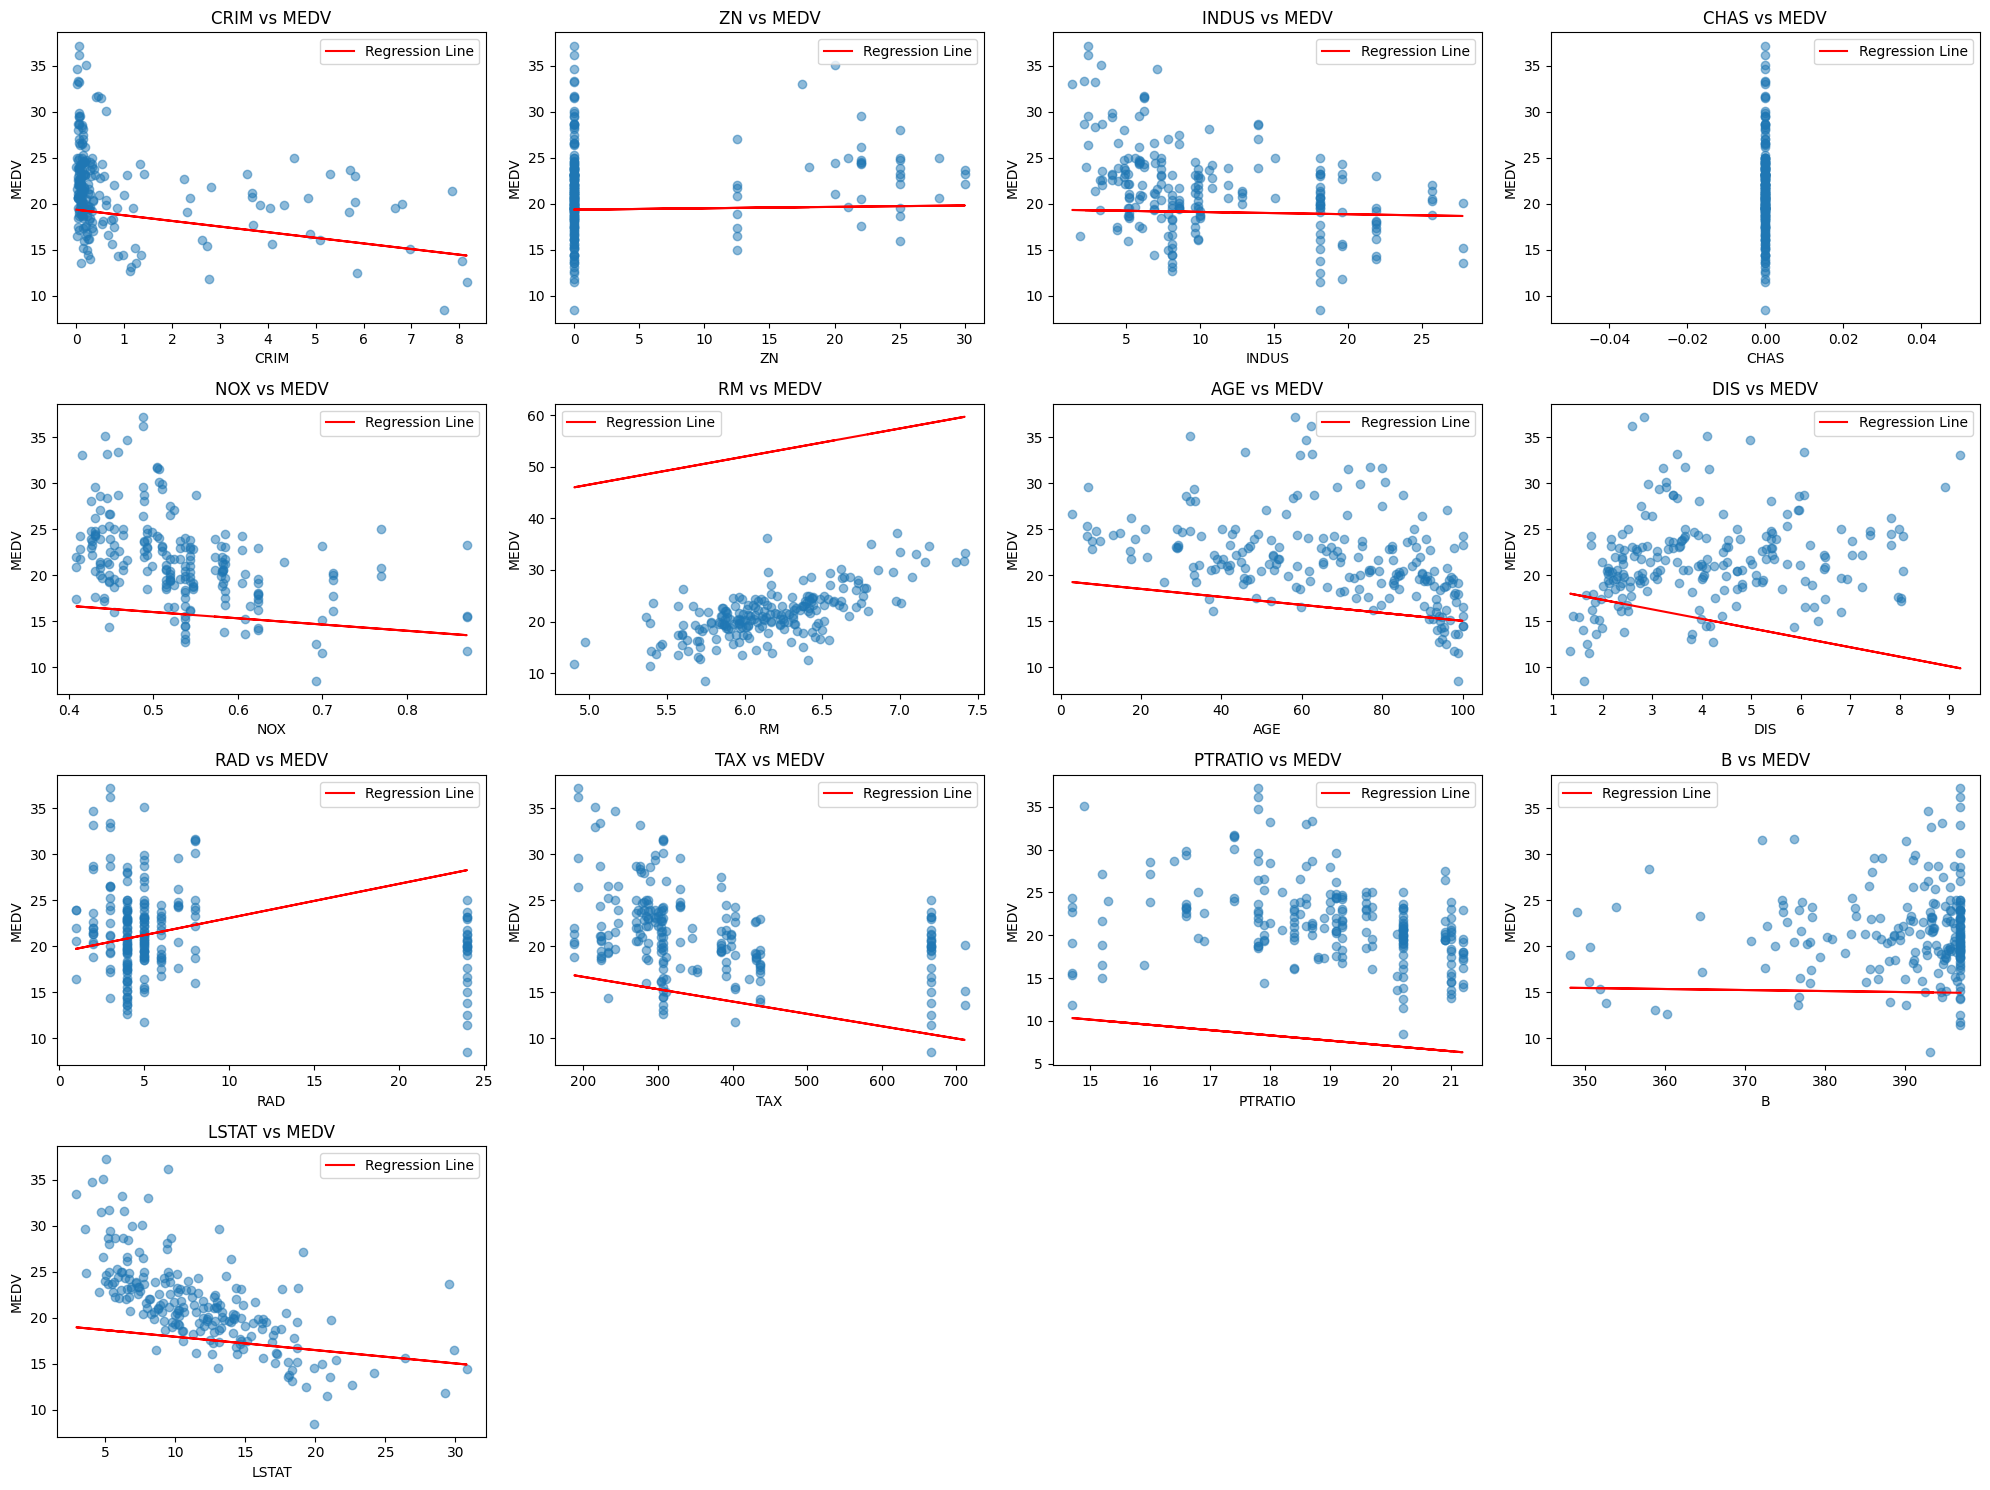

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Load the data
df = pd.read_csv("HousingData.csv")
print("Original DataFrame:\n", df)

# Drop rows with missing values
df = df.dropna()

# Calculate IQR
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1
print("IQR= ", IQR)

# Remove outliers
lowerBound = q1 - 1.5 * IQR
upperBound = q3 + 1.5 * IQR
df = df[~((df < lowerBound) | (df > upperBound)).any(axis=1)]

print("DataFrame after removing outliers:\n", df)

# Define predictors and target
X = df[["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]]
y = df["MEDV"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and calculate MSE
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE= ", mse)

# Get model parameters
slope = model.coef_
y_intercept = model.intercept_
print("Slope= ", slope)
print("y intercept= ", y_intercept)
print("y_predict= ", y_pred)

# Plotting
predictors = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]
target = "MEDV"

plt.figure(figsize=(20, 15))
for i, predictor in enumerate(predictors, 1):
    plt.subplot(4, 4, i)
    plt.scatter(df[predictor], df[target], alpha=0.5)
    plt.plot(df[predictor], model.coef_[i-1] * df[predictor] + model.intercept_, color='red', label='Regression Line')
    plt.xlabel(predictor)
    plt.ylabel(target)
    plt.title(f'{predictor} vs {target}')
    plt.legend()

# Manually adjust the layout
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.4, hspace=0.4)
plt.show()